# 1.) Pull in Data and Convert ot Monthly

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [5]:
df['Diff'] = df['Adj Close'].diff().shift(-1)
df['Target'] = np.sign(df['Diff']) 
df['Premium'] = .08*df['Adj Close']
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [7]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [8]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:"2023-09-30",:].copy()

In [9]:
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

In [ ]:
df.dropna()

# 4.) Add columns, prediction and profits.

In [10]:
y_pred = logreg.predict(X)

In [11]:
df['Predictions'] = y_pred

In [12]:
df['Profits'] = 0.

In [13]:
#TP
df.loc[(df['Target']==1)&(df['Predictions']==1),'Profits'] = df['Premium']
#TN
df.loc[(df['Target']==-1)&(df['Predictions']==1),'Profits'] =(100*df['Diff'])+df["Premium"]


# 5.) Plot profits over time

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

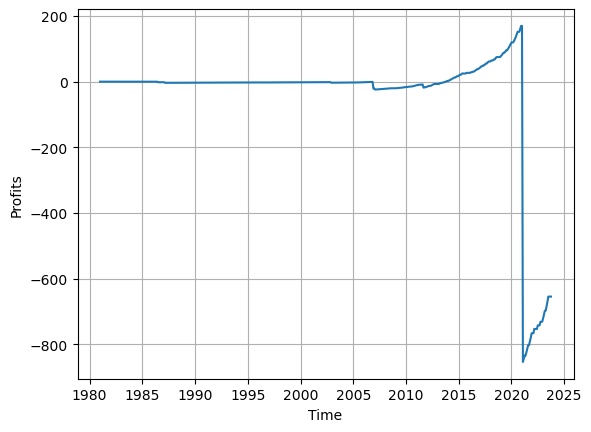

In [14]:
plt.plot(np.cumsum(df["Profits"]))
plt.grid()
plt.xlabel('Time')
plt.ylabel('Profits')
plt.plot

# 5.5.) Short write up about how you see your skills valuable to PJ and/or Philip Liu

My data analytic skills in blockchain and experience in financial market, and problem solving skills would be valuable to PJ's website.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.